In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
data = pd.read_csv("train_s3TEQDk.csv")
data_test = pd.read_csv("test_mSzZ8RL.csv")

In [4]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
TARGET = 'Is_Lead'

In [9]:
X = data.drop(TARGET, axis=1)
y = data[TARGET]

X_test = data_test

In [10]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [11]:
data.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [13]:
data.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


## EDA (Univariate)

### Target: Is_Lead

In [87]:
data.Is_Lead.value_counts()/data.shape[0]

0    0.762792
1    0.237208
Name: Is_Lead, dtype: float64

clearly a case of **imbalance dataset**

### Gender

In [14]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

No sign of any nan or inappropriate value

In [62]:
data.Gender.value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

Distribution of gender is almost proportionate with the male being slightly more in number

In [15]:
gend_dist = data.groupby(['Gender', 'Is_Lead'])["ID"].count().unstack()

In [16]:
gend_dist

Is_Lead,0,1
Gender,,
Female,88823,22705
Male,98614,35583


Evidence still inconclusive as to decide if Gender really has any influence on the target as the male leads are only higher because the number of male examples in the study is higher

### Age

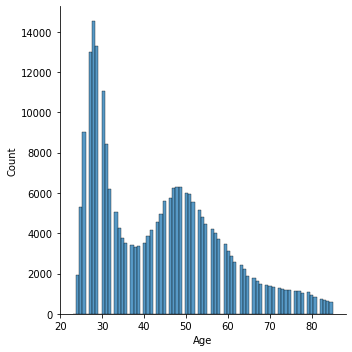

In [ ]:
sns.displot(data["Age"]);

In [17]:
data.groupby('Is_Lead')['Age'].mean()

Is_Lead
0    41.947662
1    49.993944
Name: Age, dtype: float64

We see our positive leads tend to have a higher average age but the difference is not so significant 

In [18]:
age_dist = data.groupby(['Gender', 'Is_Lead'])["Age"].mean().unstack()

In [19]:
age_dist

Is_Lead,0,1
Gender,,
Female,39.604461,48.338956
Male,44.058217,51.049968


### Region code

In [20]:
data.Region_Code.unique()

array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
       'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
       'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
       'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
       'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
      dtype=object)

In [36]:
data.Region_Code.value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

We see the occurances range from just 1497 of RG267 to over 35000 of RG268 so we don't have fair number of examples from all the regions

In [31]:
reg_data = data.groupby(['Region_Code', 'Is_Lead'])["ID"].count().unstack()

In [33]:
reg_data["ratio"] = reg_data[1]/ reg_data[0]

In [34]:
reg_data

Is_Lead,0,1,ratio
Region_Code,,,
RG250,2103,393,0.186876
RG251,4569,1381,0.302254
RG252,3694,592,0.160260
RG253,1377,481,0.349310
RG254,21127,5713,0.270412
RG255,1549,469,0.302776
RG256,2446,401,0.163941
RG257,4931,1170,0.237274
RG258,1521,430,0.282709


In [ ]:
reg_lead_data = data.groupby('Region_Code')['Is_Lead'].mean().to_dict()

### Occupation

In [37]:
data.Occupation.unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

In [38]:
data.Occupation.value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

Most of our subjects are self-employed with only a few entrepreneur. 

### Channel code

In [ ]:
data.Channel_Code.unique()

array(['X3', 'X1', 'X2', 'X4'], dtype=object)

In [40]:
data.Channel_Code.value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

A fairly large number of X1 examples compared to X4. X3 and X2 counts comparable but less than X1

### Vintage

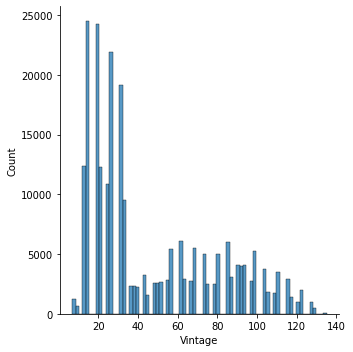

In [41]:
sns.displot(data["Vintage"]);

The shape looks somewhat similar to that of the `Age` but little packed less closely

In [ ]:
data.groupby(['Gender', 'Is_Lead'])["Vintage"].mean().unstack()

Is_Lead,0,1
Gender,,
Female,37.496324,58.460603
Male,45.892916,66.196414


### Credit_Product

In [42]:
data.Credit_Product.unique()

array(['No', nan, 'Yes'], dtype=object)

We see the presence of NaN values

In [48]:
data.Credit_Product.value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [51]:
data.Credit_Product.isna().sum()/ data.shape[0]

0.11934072642181301

10% of the data are nan which is not very small, we'll find the right treatment for it in when we discuss do multivariate analysis

### Avg_Account_Balance

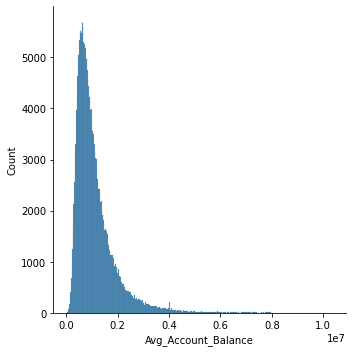

In [56]:
sns.displot(data.Avg_Account_Balance);

This looks like a power-law distribution i.e more have small money and less have huge. We might consider converting it into a normal distribution using box-cox transformation.

### Is_Active

In [59]:
data.Is_Active.unique()

array(['No', 'Yes'], dtype=object)

No null or garbage value 

In [58]:
data.Is_Active.value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

Most of the people are not active

### Observations

1. **male** examples are more but not too much than the female examples
2. Most of the people are **in active** with `avg_account_balance` in the range of **1-1.5 million** having no `credit_product`, aged around **30** and opened an account about **20** months ago.
3. We also see most of the people belong to region **RG268**

## EDA (BI-Variate)

Age vs Is_Label

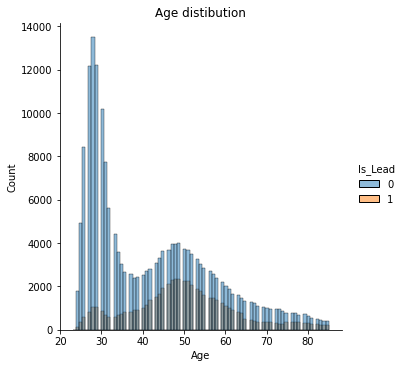

In [82]:
sns.displot(data, x="Age", hue="Is_Lead");
plt.title("Age distibution");

We see typically **lower-age** people are less likely to become a lead

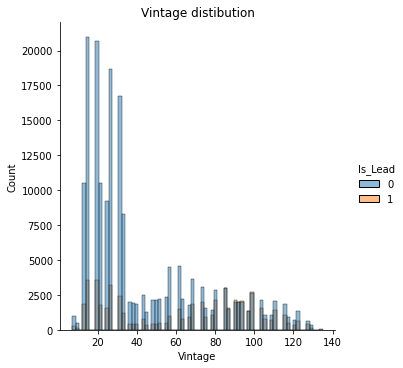

In [83]:
sns.displot(data, x="Vintage", hue="Is_Lead");
plt.title("Vintage distibution");

People with **lower-vintage** are less likely to become a lead

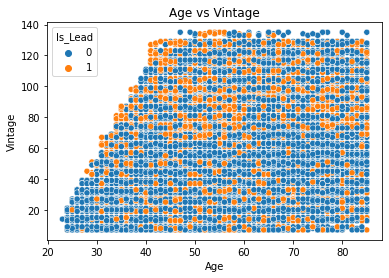

In [84]:
sns.scatterplot(data=data, x='Age', y='Vintage', hue='Is_Lead');
plt.title("Age vs Vintage");

No clear pattern to distingush from poitive and negative lead

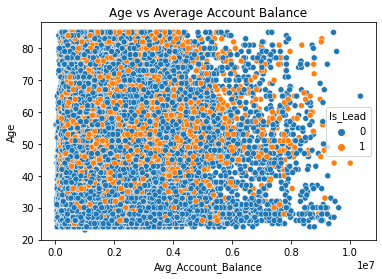

In [85]:
sns.scatterplot(data=data, x='Avg_Account_Balance', y='Age', hue='Is_Lead');
plt.title("Age vs Average Account Balance");

No clear pattern, target is randomly spread out

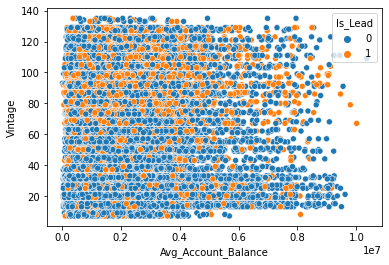

In [79]:
sns.scatterplot(data=data, x='Avg_Account_Balance', y='Vintage', hue='Is_Lead');
plt.title("Average Accoutn Balance vs Vintage");

No clear pattern althought it might seem like the positive data is spreaded mostly at the upper area of the plot i.e with a **higher vintage** 

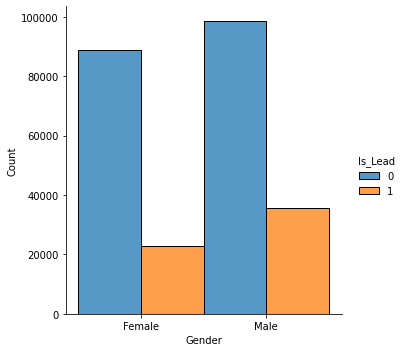

In [89]:
sns.displot(data, x="Gender", hue="Is_Lead", multiple="dodge");

Gender alone clealy is not a factor in determing the lead as both male and female are in proportion

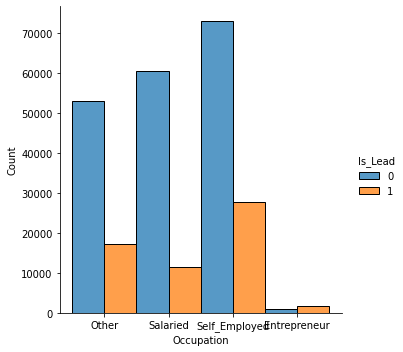

In [90]:
sns.displot(data, x="Occupation", hue="Is_Lead", multiple="dodge");

If we look at the plot we see except **Entrepreneur** rest have more non leads than leads. We can see **Salaried** have the highest ratio of non leads to leads

There are NaN values in `Credit_Product` so let's look at it's significance.

In [95]:
data_new = data.fillna("NA")

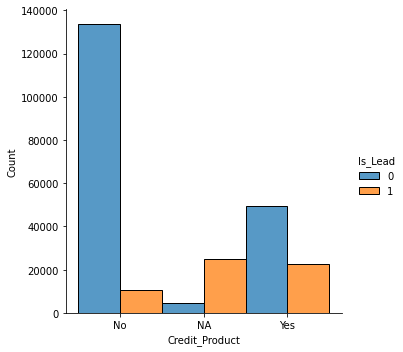

In [97]:
sns.displot(data_new, x="Credit_Product", hue="Is_Lead", multiple="dodge");

Surprisingly people for which there were **nan** are **more likely** to convert into lead as their ratio for leads to non leads is significanltly higher than the others. So we should use the fact that `Credit_Product` is NaN

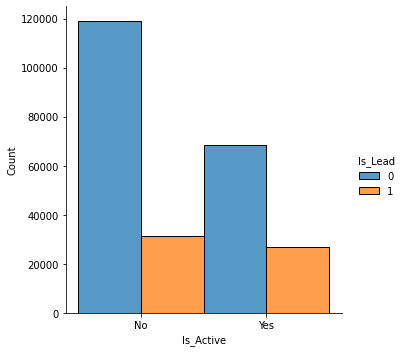

In [98]:
sns.displot(data, x="Is_Active", hue="Is_Lead", multiple="dodge");

Looking at he plot it seems **active people** has slightly more chance of becoming a lead

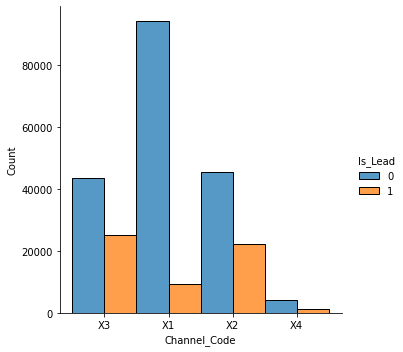

In [99]:
sns.displot(data, x="Channel_Code", hue="Is_Lead", multiple="dodge");

**X1** people have the least chance of becoming a lead

In [100]:
reg_data = data.groupby(['Region_Code', 'Is_Lead'])["ID"].count().unstack()

In [101]:
reg_data["ratio"] = reg_data[1]/ reg_data[0]

In [102]:
reg_data

Is_Lead,0,1,ratio
Region_Code,,,
RG250,2103,393,0.186876
RG251,4569,1381,0.302254
RG252,3694,592,0.160260
RG253,1377,481,0.349310
RG254,21127,5713,0.270412
RG255,1549,469,0.302776
RG256,2446,401,0.163941
RG257,4931,1170,0.237274
RG258,1521,430,0.282709


People belonging to region **RG283, RG284** have more chance of concersion than other regions. 

### Observations

1. younger-people with lower vintage period are less likely to convert
2. Gender alone is not very useful in decing the lead
3. Active people are more likely in becoming lead
4. People for which we Credit_Product is NaN is more likely to become lead
5. Entrepreneur has a little higher chance that any other profession in becoming lead.
6. People with channel code X1 are less likely to becoming lead than any other channel.

## Featurization (Hit-and-trial with multiple featuriztion techniques)

In [103]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

### Categorical Features

For categorical features we try to encode them using one-hot and label encoder(for binary features) and pick the one who gives better result 

#### Gender

In [130]:
vectorizer = CountVectorizer(binary=True)
le = LabelEncoder()

#one-hot-encoding
gender_train_ohe = vectorizer.fit_transform(X_train['Gender'].values)
gender_cv_ohe = vectorizer.transform(X_cv['Gender'].values)
gender_test_ohe = vectorizer.transform(X_test['Gender'].values)

#label-encoding
gender_train_le = le.fit_transform(X_train['Gender'].values).reshape(-1, 1)
gender_cv_le = le.transform(X_cv['Gender'].values).reshape(-1, 1)
gender_test_le = le.transform(X_test['Gender'].values).reshape(-1, 1)

#### Region code

Because `Region_Code` has so many values, it might be a good option to convert it into numerical format by simply putting the **average** positive leads from that region 

In [131]:
vectorizer = CountVectorizer(binary=True)

#one-hot
region_train_ohe = vectorizer.fit_transform(X_train['Region_Code'].values)
region_cv_ohe = vectorizer.transform(X_cv['Region_Code'].values)
region_test_ohe = vectorizer.transform(X_test['Region_Code'].values)

#computing mean leads for each region using train data
reg_lead_data = pd.concat([X_train, y_train], axis=1).groupby('Region_Code')['Is_Lead'].mean().to_dict()

#mapping regions with their mean (use 0.2 if the unseen data has a region we haven't seen) 
region_train_num = X_train['Region_Code'].apply(lambda x: reg_lead_data.get(x, 0.2)).values.reshape(-1, 1)
region_cv_num = X_cv["Region_Code"].apply(lambda x: reg_lead_data.get(x, 0.2)).values.reshape(-1, 1)
region_test_num = X_test["Region_Code"].apply(lambda x: reg_lead_data.get(x, 0.2)).values.reshape(-1, 1)

#### Occupation

In [132]:
vectorizer = CountVectorizer(binary=True)

#one-hot
occ_train_ohe = vectorizer.fit_transform(X_train['Occupation'].values)
occ_cv_ohe = vectorizer.transform(X_cv['Occupation'].values)
occ_test_ohe = vectorizer.transform(X_test['Occupation'].values)

#### Channel Code

In [133]:
vectorizer = CountVectorizer(binary=True)

#one-hot
channel_train_ohe = vectorizer.fit_transform(X_train['Channel_Code'].values)
channel_cv_ohe = vectorizer.transform(X_cv['Channel_Code'].values)
channel_test_ohe = vectorizer.transform(X_test['Channel_Code'].values)

#### Channel Code

In [134]:
vectorizer = CountVectorizer(binary=True)

#one-hot
channel_train_ohe = vectorizer.fit_transform(X_train['Channel_Code'].values)
channel_cv_ohe = vectorizer.transform(X_cv['Channel_Code'].values)
channel_test_ohe = vectorizer.transform(X_test['Channel_Code'].values)

#### Credit product

In [135]:
vectorizer = CountVectorizer(binary=True)

#one-hot
cred_pro_train_ohe = vectorizer.fit_transform(X_train['Credit_Product'].fillna("NA").values)
cred_pro_cv_ohe = vectorizer.transform(X_cv['Credit_Product'].fillna("NA").values)
cred_pro_test_ohe = vectorizer.transform(X_test['Credit_Product'].fillna("NA").values)

#### Is_Active

In [136]:
vectorizer = CountVectorizer(binary=True)
le = LabelEncoder()

#one-hot
active_train_ohe = vectorizer.fit_transform(X_train['Is_Active'].values)
active_cv_ohe = vectorizer.transform(X_cv['Is_Active'].values)
active_test_ohe = vectorizer.transform(X_test['Is_Active'].values)

#label-encode
active_train_le = le.fit_transform(X_train['Is_Active'].values).reshape(-1, 1)
active_cv_le = le.transform(X_cv['Is_Active'].values).reshape(-1, 1)
active_test_le = le.transform(X_test['Is_Active'].values).reshape(-1, 1)

###  Numerical

For numerical features we do scaling, trying both min-max scaler and standard scaler and pick the one that suit the most.<br> For `Average_Account_Balance` we also do box-cox transformation to convert it into normal form for models to work better.<br>
We experemented with two new features `Vintage_Age_Mul` = age * vintage / 12 and `Vintage_Age_Min` = age - vintage / 12

#### Age

In [137]:
std_scaler = StandardScaler()
mnmx_scaler = MinMaxScaler()

#original scale
age_train = X_train[['Age']].values
age_cv = X_cv[['Age']].values
age_test = X_test[['Age']].values

#standard scale
age_train_std = std_scaler.fit_transform(age_train)
age_cv_std = std_scaler.transform(age_cv)
age_test_std = std_scaler.transform(age_test)

#min-max scale
age_train_mnx = mnmx_scaler.fit_transform(age_train)
age_cv_mnx = mnmx_scaler.transform(age_cv)
age_test_mnx = mnmx_scaler.transform(age_test)

#### Vintage

In [138]:
std_scaler = StandardScaler()
mnmx_scaler = MinMaxScaler()

#original
vintage_train = X_train[['Vintage']].values
vintage_cv = X_cv[['Vintage']].values
vintage_test = X_test[['Vintage']].values

#standard
vintage_train_std = std_scaler.fit_transform(vintage_train)
vintage_cv_std = std_scaler.transform(vintage_cv)
vintage_test_std = std_scaler.transform(vintage_test)

#min-max
vintage_train_mnx = mnmx_scaler.fit_transform(vintage_train)
vintage_cv_mnx = mnmx_scaler.transform(vintage_cv)
vintage_test_mnx = mnmx_scaler.transform(vintage_test)

#### vintage_age_mul

In [139]:
#original
vintage_age_mul_train = (X_train[['Vintage']].values//12) * X_train[['Age']].values
vintage_age_mul_cv = (X_cv[['Vintage']].values//12)  * X_cv[['Age']].values
vintage_age_mul_test = (X_test[['Vintage']].values//12) * X_test[['Age']].values

#stanndard
vintage_age_mul_train_std = std_scaler.fit_transform(vintage_age_mul_train)
vintage_age_mul_cv_std = std_scaler.transform(vintage_age_mul_cv)
vintage_age_mul_test_std = std_scaler.transform(vintage_age_mul_test)

#min-max
vintage_age_mul_train_mnx = mnmx_scaler.fit_transform(vintage_age_mul_train)
vintage_age_mul_cv_mnx = mnmx_scaler.transform(vintage_age_mul_cv)
vintage_age_mul_test_mnx = mnmx_scaler.transform(vintage_age_mul_test)

#### vintage_age_min

In [140]:
#original
vintage_age_min_train =  X_train[['Age']].values - X_train[['Vintage']].values//12 
vintage_age_min_cv = X_cv[['Age']].values - X_cv[['Vintage']].values//12 
vintage_age_min_test = X_test[['Age']].values - X_test[['Vintage']].values/1/2

#standard
vintage_age_min_train_std = std_scaler.fit_transform(vintage_age_min_train)
vintage_age_min_cv_std = std_scaler.transform(vintage_age_min_cv)
vintage_age_min_test_std = std_scaler.transform(vintage_age_min_test)

#min-max
vintage_age_min_train_mnx = mnmx_scaler.fit_transform(vintage_age_min_train)
vintage_age_min_cv_mnx = mnmx_scaler.transform(vintage_age_min_cv)
vintage_age_min_test_mnx = mnmx_scaler.transform(vintage_age_min_test)

#### Avg_bal

In [141]:
std_scaler = StandardScaler()
mnmx_scaler = MinMaxScaler()
bcx = PowerTransformer(standardize=True)

#original
acc_bal_train = X_train[['Avg_Account_Balance']].values
acc_bal_cv = X_cv[['Avg_Account_Balance']].values
acc_bal_test = X_test[['Avg_Account_Balance']].values

#standard
acc_bal_train_std = std_scaler.fit_transform(acc_bal_train)
acc_bal_cv_std = std_scaler.transform(acc_bal_cv)
acc_bal_test_std = std_scaler.transform(acc_bal_test)

#min-max
acc_bal_train_mnx = mnmx_scaler.fit_transform(acc_bal_train)
acc_bal_cv_mnx = mnmx_scaler.transform(acc_bal_cv)
acc_bal_test_mnx = mnmx_scaler.transform(acc_bal_test)

#box-cox
acc_bal_train_bcx = bcx.fit_transform(acc_bal_train)
acc_bal_cv_bcx = bcx.transform(acc_bal_cv)
acc_bal_test_bcx = bcx.transform(acc_bal_test)

In [34]:
# for k in k_values:
#     # define pipeline
#     model = DecisionTreeClassifier()
#     over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#     under = RandomUnderSampler(sampling_strategy=0.5)
#     steps = [('over', over), ('under', under), ('model', model)]
#     pipeline = Pipeline(steps=steps)
#     # evaluate pipeline
#     cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#     score = mean(scores)
#     print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

### Feature formation

#### featureset 0(label encodes(for binary categorical) + orignial numeric scale  +region(mean))

In [142]:
X_train_0 = sp.hstack((gender_train_le, age_train, region_train_ohe, occ_train_ohe, channel_train_ohe,
                       vintage_train, cred_pro_train_ohe, acc_bal_train, active_train_le)).tocsr() 
X_cv_0 = sp.hstack((gender_cv_le, age_cv, region_cv_ohe, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv, cred_pro_cv_ohe, acc_bal_cv, active_cv_le)).tocsr()
X_test_0 = sp.hstack((gender_test_le, age_test, region_test_ohe, occ_test_ohe, channel_test_ohe,
                       vintage_test, cred_pro_test_ohe, acc_bal_test, active_test_le)).tocsr()

#### featureset 1(one-hot for all + standard numeric scale)

In [143]:
X_train_1 = sp.hstack((gender_train_ohe, age_train_std, region_train_ohe, occ_train_ohe, channel_train_ohe,
                       vintage_train_std, cred_pro_train_ohe, acc_bal_train_std, active_train_ohe)).tocsr() 
X_cv_1 = sp.hstack((gender_cv_ohe, age_cv_std, region_cv_ohe, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv_std, cred_pro_cv_ohe, acc_bal_cv_std, active_cv_ohe)).tocsr()
X_test_1 = sp.hstack((gender_test_ohe, age_test_std, region_test_ohe, occ_test_ohe, channel_test_ohe,
                       vintage_test_std, cred_pro_test_ohe, acc_bal_test_std, active_test_ohe)).tocsr()

#### feature set 2(one-hot for all + min-max numeric scale)

In [144]:
X_train_2 = sp.hstack((gender_train_ohe, age_train_mnx, region_train_ohe, occ_train_ohe, channel_train_ohe,
                       vintage_train_mnx, cred_pro_train_ohe, acc_bal_train_mnx, active_train_ohe)).tocsr() 
X_cv_2 = sp.hstack((gender_cv_ohe, age_cv_mnx, region_cv_ohe, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv_mnx, cred_pro_cv_ohe, acc_bal_cv_mnx, active_cv_ohe)).tocsr()
X_test_2 = sp.hstack((gender_test_ohe, age_test_mnx, region_test_ohe, occ_test_ohe, channel_test_ohe,
                       vintage_test_mnx, cred_pro_test_ohe, acc_bal_test_mnx, active_test_ohe)).tocsr()

#### feature set3(one-hot all + original numeric scale)

In [145]:
X_train_3 = sp.hstack((gender_train_ohe, age_train, region_train_ohe, occ_train_ohe, channel_train_ohe,
                       vintage_train, cred_pro_train_ohe, acc_bal_train, active_train_ohe)).tocsr() 
X_cv_3 = sp.hstack((gender_cv_ohe, age_cv, region_cv_ohe, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv, cred_pro_cv_ohe, acc_bal_cv, active_cv_ohe)).tocsr()
X_test_3 = sp.hstack((gender_test_ohe, age_test, region_test_ohe, occ_test_ohe, channel_test_ohe,
                       vintage_test, cred_pro_test_ohe, acc_bal_test, active_test_ohe)).tocsr()

#### feature set4(region - mean + one-hot rest + original numeric)

In [146]:
X_train_4 = sp.hstack((gender_train_ohe, age_train, region_train_num, occ_train_ohe, channel_train_ohe,
                       vintage_train, cred_pro_train_ohe, acc_bal_train, active_train_ohe)).tocsr() 
X_cv_4 = sp.hstack((gender_cv_ohe, age_cv, region_cv_num, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv, cred_pro_cv_ohe, acc_bal_cv, active_cv_ohe)).tocsr()
X_test_4 = sp.hstack((gender_test_ohe, age_test, region_test_num, occ_test_ohe, channel_test_ohe,
                       vintage_test, cred_pro_test_ohe, acc_bal_test, active_test_ohe)).tocsr()

#### feature set 5 (no gender+ label encode (is_active)+ std numeric)

In [147]:
X_train_5 = sp.hstack((age_train_std, region_train_num, occ_train_ohe, channel_train_ohe,
                       vintage_train_std, cred_pro_train_ohe, acc_bal_train_std, active_train_ohe)).tocsr() 
X_cv_5 = sp.hstack((age_cv_std, region_cv_num, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv_std, cred_pro_cv_ohe, acc_bal_cv_std, active_cv_ohe)).tocsr()
X_test_5 = sp.hstack((age_test_std, region_test_num, occ_test_ohe, channel_test_ohe,
                       vintage_test_std, cred_pro_test_ohe, acc_bal_test_std, active_test_ohe)).tocsr()

#### feature set6(binary cat label + rest ohe + min max numeric except account bal (power transformed)+ custom features)

In [148]:
X_train_6 = sp.hstack((gender_train_le, age_train_mnx, region_train_num, occ_train_ohe, channel_train_ohe,
                       vintage_train_mnx, cred_pro_train_ohe, acc_bal_train_bcx, active_train_ohe, vintage_age_mul_train_mnx, vintage_age_min_train_mnx)).tocsr() 
X_cv_6 = sp.hstack((gender_cv_le, age_cv_mnx, region_cv_num, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv_mnx, cred_pro_cv_ohe, acc_bal_cv_bcx, active_cv_ohe, vintage_age_mul_cv_mnx, vintage_age_min_cv_mnx)).tocsr()
X_test_6 = sp.hstack((gender_test_le, age_test_mnx, region_test_num, occ_test_ohe, channel_test_ohe,
                       vintage_test_mnx, cred_pro_test_ohe, acc_bal_test_bcx, active_test_ohe, vintage_age_mul_test_mnx, vintage_age_min_test_mnx)).tocsr()

#### feature set7(all ohe + numerical min-max+ acc bal box cox + no custom features)

In [155]:
X_train_7 = sp.hstack((gender_train_ohe, age_train_mnx, region_train_ohe, occ_train_ohe, channel_train_ohe,
                       vintage_train_mnx, cred_pro_train_ohe, acc_bal_train_bcx, active_train_ohe)).tocsr() 
X_cv_7 = sp.hstack((gender_cv_ohe, age_cv_mnx, region_cv_ohe, occ_cv_ohe, channel_cv_ohe,
                       vintage_cv_mnx, cred_pro_cv_ohe, acc_bal_cv_bcx, active_cv_ohe)).tocsr()
X_test_7 = sp.hstack((gender_test_ohe, age_test_mnx, region_test_ohe, occ_test_ohe, channel_test_ohe,
                       vintage_test_mnx, cred_pro_test_ohe, acc_bal_test_bcx, active_test_ohe)).tocsr()

## Modelling

### Trying to visualize the distribution using t-SNE

In [121]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train_1)

In [123]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

## Models

In [124]:
from sklearn.metrics import roc_auc_score, classification_report

### Trying SMOTE to upsample the data

In [ ]:
over = SMOTE(k_neighbors=9, sampling_strategy=1)
under = RandomUnderSampler()
steps = [('over', over)]
pipeline = Pipeline(steps=steps)

### LR

In [125]:
from sklearn.linear_model import LogisticRegression

We pick any random feature set and try to upsample it

In [127]:
X_train_5_res, y_train_res = pipeline.fit_resample(X_train_5, y_train)

In [ ]:
clf = LogisticRegression(random_state=0, max_iter=300).fit(X_train_5, y_train)

In [ ]:
print(classification_report(y_cv, clf.predict(X_cv_5)))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37487
           1       0.84      0.48      0.61     11658

    accuracy                           0.85     49145
   macro avg       0.85      0.73      0.76     49145
weighted avg       0.85      0.85      0.84     49145



In [ ]:
roc_auc_score(y_cv, clf.predict_proba(X_cv_5)[:, 1])

0.8585268763818223

Repeating the same for other feature sets

In [ ]:
X_train_6_res, y_train_res = pipeline.fit_resample(X_train_6, y_train)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_6_res, y_train_res)

In [ ]:
print(classification_report(y_cv, clf.predict(X_cv_6)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86     37487
           1       0.57      0.76      0.65     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.79      0.76     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_cv, clf.predict(X_cv_6))

0.7880497285722287

for feature set 1

In [ ]:
X_train_1_res, y_train_res = pipeline.fit_resample(X_train_1, y_train)

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_1_res, y_train_res)

In [ ]:
print(classification_report(y_cv, clf.predict(X_cv_1)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     37487
           1       0.57      0.76      0.65     11658

    accuracy                           0.81     49145
   macro avg       0.74      0.79      0.76     49145
weighted avg       0.83      0.81      0.81     49145



In [ ]:
roc_auc_score(y_cv, clf.predict(X_cv_1))

0.7885489832506607

Taking a look the sample submission 

In [ ]:
sub = pd.read_csv("sample_submission_eyYijxG.csv")

In [ ]:
submission = pd.DataFrame({"ID": data_test.ID, "Is_Lead": clf.predict_proba(X_test_1)[:, 1]})

In [ ]:
submission.to_csv("submission_lr.csv", index=False)

In [ ]:
submission.shape

(105312, 2)

In [ ]:
sub.shape

(105312, 2)

Looking at the feature importance according to this simple LR model

In [ ]:
print(clf.coef_)

[[ 9.29801891e-02  1.34380851e-01  1.50645567e-01 -2.18575018e-01
   7.89430164e-02  8.93457884e-02 -1.66170439e-01  8.23111666e-02
   7.92089194e-02 -8.01580363e-02  1.30953588e-01  4.20443645e-02
  -2.72238616e-02 -8.72011139e-02 -2.10042375e-02 -1.94722820e-01
   1.81292143e-01 -2.09420530e-02 -9.06101272e-02 -2.13083614e-01
  -3.31827215e-01  2.11135918e-01  1.68977764e-01  1.26567698e-01
  -9.80855978e-02  4.21531919e-02  1.26452639e-01 -3.64607127e-02
  -1.08809723e-01 -2.27412141e-02  2.32928925e-01 -2.94664833e-01
   1.52856199e-01  2.35649694e-01 -9.80286264e-02  3.00183497e-02
   1.64443049e-01  1.62387869e-01  3.35490707e-01 -3.96158566e-01
   5.64481855e-01 -2.76452955e-01 -4.97812891e-01  3.64802662e-01
   2.08690320e-01  1.51680949e-01  3.07232679e-01  2.28718933e+00
  -1.84371239e+00 -2.16115894e-01 -4.27440650e-02 -3.03182128e-02
   2.57679253e-01 -2.09205999e-02 -2.26010657e-04  2.65077506e-03]]


Trying without upsampling for a random feature set

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train_4, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_4)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     37487
           1       0.00      0.00      0.00     11658

    accuracy                           0.76     49145
   macro avg       0.38      0.50      0.43     49145
weighted avg       0.58      0.76      0.66     49145



/home/rajib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rajib/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
roc_auc_score(y_test, clf.predict(X_test_4))

0.5

Trying without upsampling with a different feature set

In [149]:
clf = LogisticRegression(random_state=0).fit(X_train_5, y_train)

In [151]:
print(classification_report(y_cv, clf.predict(X_cv_5)))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     37487
           1       0.82      0.49      0.61     11658

    accuracy                           0.85     49145
   macro avg       0.84      0.73      0.76     49145
weighted avg       0.85      0.85      0.84     49145



In [154]:
roc_auc_score(y_cv, clf.predict_proba(X_cv_5)[:, 1])

0.8579998085503175

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(max_depth=10, class_weight="balanced_subsample", random_state=0).fit(X_train_9, y_train)

In [ ]:
print(classification_report(y_cv, clf.predict(X_cv_9)))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     37487
           1       0.60      0.77      0.67     11658

    accuracy                           0.82     49145
   macro avg       0.76      0.81      0.78     49145
weighted avg       0.85      0.82      0.83     49145



In [ ]:
roc_auc_score(y_train, clf.predict_proba(X_train_9)[:, 1])

0.8839099613374591

In [ ]:
roc_auc_score(y_cv, clf.predict_proba(X_cv_9)[:, 1])

0.8721853277867384

In [ ]:
clf.feature_importances_

array([0.06926892, 0.00846482, 0.00146909, 0.00516557, 0.0258955 ,
       0.00396987, 0.07540338, 0.00767207, 0.00758234, 0.00082701,
       0.06716529, 0.22097912, 0.34510078, 0.07917577, 0.00918605,
       0.01039233, 0.01009642, 0.05218566])

In [ ]:
submission = pd.DataFrame({"ID": data_test.ID, "Is_Lead": clf.predict(X_test_5)})

In [ ]:
submission.to_csv("submission_dt2.csv", index=False)

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_2, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     37487
           1       0.82      0.01      0.01     11658

    accuracy                           0.76     49145
   macro avg       0.79      0.50      0.44     49145
weighted avg       0.78      0.76      0.66     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_2))

0.5027592718675327

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_3, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_3)))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     37487
           1       0.82      0.01      0.01     11658

    accuracy                           0.76     49145
   macro avg       0.79      0.50      0.44     49145
weighted avg       0.78      0.76      0.66     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_3))

0.5027592718675327

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_4, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_4)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     37487
           1       0.85      0.42      0.57     11658

    accuracy                           0.85     49145
   macro avg       0.85      0.70      0.74     49145
weighted avg       0.85      0.85      0.83     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_4))

0.7007347198484175

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train_5, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_5)))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     37487
           1       0.85      0.42      0.57     11658

    accuracy                           0.85     49145
   macro avg       0.85      0.70      0.74     49145
weighted avg       0.85      0.85      0.83     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_5))

0.7007347198484175

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced_subsample").fit(X_train_1, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_1)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37487
           1       0.51      0.78      0.62     11658

    accuracy                           0.77     49145
   macro avg       0.72      0.78      0.73     49145
weighted avg       0.82      0.77      0.79     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_1))

0.7759103970362268

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced_subsample").fit(X_train_2, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37487
           1       0.51      0.78      0.62     11658

    accuracy                           0.77     49145
   macro avg       0.72      0.78      0.73     49145
weighted avg       0.82      0.77      0.79     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_2))

0.7759103970362268

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced_subsample").fit(X_train_3, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_3)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37487
           1       0.51      0.78      0.62     11658

    accuracy                           0.77     49145
   macro avg       0.72      0.78      0.73     49145
weighted avg       0.82      0.77      0.79     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_3))

0.7759103970362268

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced_subsample").fit(X_train_4, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_4)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     37487
           1       0.55      0.77      0.64     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.79      0.75     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_4))

0.788599440497753

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced_subsample").fit(X_train_5, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_5)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     37487
           1       0.55      0.77      0.64     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.79      0.75     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_5))

0.788599440497753

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced").fit(X_train_1, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_1)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37487
           1       0.51      0.78      0.62     11658

    accuracy                           0.77     49145
   macro avg       0.72      0.78      0.73     49145
weighted avg       0.82      0.77      0.79     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_1))

0.7759504109077022

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced").fit(X_train_2, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37487
           1       0.51      0.78      0.62     11658

    accuracy                           0.77     49145
   macro avg       0.72      0.78      0.73     49145
weighted avg       0.82      0.77      0.79     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_2))

0.7759504109077022

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced").fit(X_train_3, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_3)))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     37487
           1       0.51      0.78      0.62     11658

    accuracy                           0.77     49145
   macro avg       0.72      0.78      0.73     49145
weighted avg       0.82      0.77      0.79     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_3))

0.7759504109077022

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced").fit(X_train_4, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_4)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     37487
           1       0.55      0.77      0.64     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.79      0.75     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_4))

0.7883478567417641

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0, class_weight="balanced").fit(X_train_5, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_5)))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     37487
           1       0.55      0.77      0.64     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.79      0.75     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_5))

0.7883478567417641

### IMB Learns

In [ ]:
# !pip3 install imblearn
# ! pip3 install delayed

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
clf = BalancedRandomForestClassifier(n_estimators=50).fit(X_train_1, y_train)

In [ ]:
print(classification_report(y_cv, clf.predict(X_cv_1)))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     37487
           1       0.57      0.77      0.65     11658

    accuracy                           0.81     49145
   macro avg       0.74      0.79      0.76     49145
weighted avg       0.84      0.81      0.81     49145



In [ ]:
roc_auc_score(y_cv, clf.predict(X_cv_1))

0.7924105071927879

In [ ]:
clf = BalancedRandomForestClassifier(n_estimators=10).fit(X_train_2, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     37487
           1       0.57      0.74      0.64     11658

    accuracy                           0.81     49145
   macro avg       0.74      0.78      0.76     49145
weighted avg       0.83      0.81      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_2))

0.7826652119712588

In [ ]:
clf = BalancedRandomForestClassifier(n_estimators=10).fit(X_train_3, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_3)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     37487
           1       0.57      0.73      0.64     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.78      0.75     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_3))

0.7803996824920921

In [ ]:
clf = BalancedRandomForestClassifier(n_estimators=10).fit(X_train_4, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_4)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     37487
           1       0.57      0.73      0.64     11658

    accuracy                           0.80     49145
   macro avg       0.74      0.78      0.75     49145
weighted avg       0.83      0.80      0.81     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_4))

0.7777549399489199

In [ ]:
clf = BalancedRandomForestClassifier(n_estimators=10).fit(X_train_5, y_train)

In [ ]:
print(classification_report(y_test, clf.predict(X_test_5)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87     37487
           1       0.58      0.74      0.65     11658

    accuracy                           0.81     49145
   macro avg       0.74      0.78      0.76     49145
weighted avg       0.83      0.81      0.82     49145



In [ ]:
roc_auc_score(y_test, clf.predict(X_test_5))

0.7838641144667556

## XGB (Final Submission)

In [ ]:
# !pip3 install xgboost

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier

In [87]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
model = XGBClassifier(n_estimators=50, min_child_weight=7, learning_rate=0.25)
model.fit(X_train_10, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.25, max_delta_step=0, max_depth=3,
              min_child_weight=7, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [88]:
params = {
    'learning_rate':[0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9],
    'reg_alpha' : [40, 50, 80],
    'colsample_bytree' : [0.1, 0.5],
    'min_child_weight' : [0, 4, 7, 10],
    'n_estimators': [100, 300, 500],
}

In [89]:
clf = RandomizedSearchCV(model, params, random_state=0)

In [ ]:
clf.fit(X_train_7, y_train)

In [76]:
roc_auc_score(y_cv, model.predict_proba(X_cv_7)[:, 1])

0.8730409523611692

In [81]:
model.predict_proba(X_test_7)[:, 1]

array([0.06039916, 0.8272692 , 0.0512806 , ..., 0.05972619, 0.2081429 ,
       0.047894  ], dtype=float32)

In [ ]:
pd.read_csv("sample_submission_eyYijxG.csv")

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,0
105308,CWQ72DWS,0
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [157]:
submission = pd.DataFrame({"ID": data_test.ID, "Is_Lead": model.predict_proba(X_test_7)[:, 1]})

In [159]:
submission.to_csv("submission_xbm.csv", index=False)

### DL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#designing the layput for the sequential model
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=(X_train_9.shape[1],)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 64)                1216      
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_80 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_43 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_81 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_82 (Dense)             (None, 1)               

In [ ]:
#compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[keras.metrics.AUC(name="auc")])

In [ ]:
#callbak for saving the bset model 
mcp_save = ModelCheckpoint('weights/mdl_wts.hdf5', save_best_only=True, monitor='val_auc', mode='max')

In [ ]:
val_X = X_cv_9.toarray()
train_X = X_train_9.toarray()

In [ ]:
#fitting the model
model.fit(train_X, y_train, epochs=100, batch_size=64, validation_data=((val_X, y_cv)), callbacks=[mcp_save])

NameError: ignored

In [ ]:
import kerastuner as kt
from kerastuner.tuners import RandomSearch
# !pip install -q -U keras-tuner

In [ ]:
#building the model blueprint
def model_builder(hp):
    model = keras.Sequential()
    #adding the input dimensions
    model.add(layers.InputLayer(input_shape=(X_train_5.shape[1])))
    
    #adding the layers hyperparameter
    for i in range(hp.Int('num_layers', 2, 10)):
        #adding units hyperparameter
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                          min_value=8,
                                          max_value=512,
                                          step=16),
                              activation='relu'))
    #adding final dense layer
    model.add(layers.Dense(1, activation='sigmoid'))
   
    #compiling the model with learning_rate hyperparameter and AUC metric
    model.compile(
      optimizer=keras.optimizers.Adam(
          hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
      loss='binary_crossentropy',
      metrics=[keras.metrics.AUC()])
    return model

In [ ]:
#configurng the RandomSearch for parameter tuning 
tuner = RandomSearch(
    model_builder,
    objective=kt.Objective("val_auc", direction="max"),
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

INFO:tensorflow:Reloading Oracle from existing project my_dir/helloworld/oracle.json


In [ ]:
#starting the tuning process
tuner.search(train_X, y_train,
             epochs=5,
             validation_data=(val_X, y_cv))

Trial 3 Complete [00h 13m 05s]
val_auc: 0.8699346582094828

Best val_auc So Far: 0.8699346582094828
Total elapsed time: 00h 21m 26s

Search: Running Trial #4

Hyperparameter    |Value             |Best Value So Far 
num_layers        |5                 |5                 
units_0           |64                |288               
units_1           |128               |224               
learning_rate     |0.01              |0.01              
units_2           |472               |360               
units_3           |120               |312               
units_4           |248               |136               
units_5           |232               |72                
units_6           |216               |440               
units_7           |328               |56                
units_8           |312               |408               

Epoch 1/5
6144/6144 [==============================] - 43s 7ms/step - loss: 0.3641 - auc: 0.8582 - val_loss: 0.3575 - val_auc: 0.8650
Epoch 2/5
6144/6144 [=

KeyboardInterrupt: ignored

### lightGBM

In [46]:
# !pip install lightgbm
import lightgbm

In [53]:
#replacing all the nan values in Credit_Product with string "NA" 
X_train.Credit_Product.fillna("NA", inplace=True)
X_cv.Credit_Product.fillna("NA", inplace=True)
X_test.Credit_Product.fillna("NA", inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [126]:
#find all the columns that has type object
obj_feat = list(X_train.loc[:, X_train.dtypes == 'object'].columns.values)

In [127]:
#converting obect type columns to category type
for feature in obj_feat:
    X_train[feature] = pd.Series(X_train[feature], dtype="category")
    X_cv[feature] = pd.Series(X_train[feature], dtype="category")
    X_test[feature] = pd.Series(X_train[feature], dtype="category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [86]:
# categorical_features = np.where(X_train.dtypes != np.float)[0]
train_data = lightgbm.Dataset(X_train, label=y_train)
cv_data = lightgbm.Dataset(X_cv, label=y_cv)
test_data = lightgbm.Dataset(X_test)

In [125]:
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 100,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.01,
    'verbose': 0
}

In [124]:
model = lightgbm.train(parameters,
                       train_data,
                       valid_sets=cv_data,
                       num_boost_round=1000,
                       early_stopping_rounds=100)

### CatBoost

Since catboost has the ability to internally handle categorical features we provide it with the original dataset instead of the featurized dataset

In [277]:
# !pip install catboost
from catboost import CatBoostClassifier, Pool

In [334]:
#replace all nan values with "NA"
X_train.Credit_Product.fillna("NA", inplace=True)
X_cv.Credit_Product.fillna("NA", inplace=True)
X_test.Credit_Product.fillna("NA", inplace=True)

from sklearn.preprocessing import MinMaxScaler, PowerTransformer, StandardScaler

mnx = MinMaxScaler()
pt = PowerTransformer(standardize=True)

#power transform the avg_account_balance fature
X_train['Avg_Account_Balance'] = pt.fit_transform(X_train['Avg_Account_Balance'])
X_cv['Avg_Account_Balance'] = pt.transform(X_cv['Avg_Account_Balance'])
X_test['Avg_Account_Balance'] = pt.transform(X_test['Avg_Account_Balance'])

#min_max scale age and vintage feature
X_train[["Age", "Vintage"]] = mnx.fit_transform(X_train[["Age", "Vintage"]])
X_cv[["Age", "Vintage"]] = mnx.transform(X_cv[["Age", "Vintage"]])
X_test[["Age", "Vintage"]] = mnx.transform(X_test[["Age", "Vintage"]])

#custom age_vintage_mul feature
X_train["Age_Vintage_Mul"] = X_train["Age"]*(X_train["Vintage"]//12)**2
X_cv["Age_Vintage_Mul"] = X_cv["Age"]*(X_cv["Vintage"]//12)**2
X_test["Age_Vintage_Mul"] = X_test["Age"]*(X_test["Vintage"]//12)**2

#custom age_vintage_min feature
X_train["Age_Vintage_Min"] = X_train["Age"]**2 - (X_train["Vintage"]//12)**2
X_cv["Age_Vintage_Min"] = X_cv["Age"]**2 - (X_cv["Vintage"]//12)**2
X_test["Age_Vintage_Min"] = X_test["Age"]**2 - (X_test["Vintage"]//12)**2


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [337]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196580 entries, 75880 to 31356
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               196580 non-null  object 
 1   Age                  196580 non-null  float64
 2   Region_Code          196580 non-null  object 
 3   Occupation           196580 non-null  object 
 4   Channel_Code         196580 non-null  object 
 5   Vintage              196580 non-null  float64
 6   Credit_Product       196580 non-null  object 
 7   Avg_Account_Balance  196580 non-null  float64
 8   Is_Active            196580 non-null  object 
 9   Age_Vintage_Mul      196580 non-null  float64
 10  Age_Vintage_Min      196580 non-null  float64
dtypes: float64(5), object(6)
memory usage: 23.0+ MB


In [338]:
#listing all the categorical features to provide cataboost
categorical_features_indices = np.where(X_train.dtypes != np.float64)[0]
categorical_features_indices

array([0, 2, 3, 4, 6, 8])

In [352]:
model3 = CatBoostClassifier(iterations=300, depth=8, learning_rate=0.1, l2_leaf_reg=1, eval_metric='AUC')

In [353]:
model3.fit(X_train, y_train, eval_set=(X_cv, y_cv),plot=True, cat_features=categorical_features_indices)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8632768	best: 0.8632768 (0)	total: 392ms	remaining: 1m 57s
1:	test: 0.8660093	best: 0.8660093 (1)	total: 727ms	remaining: 1m 48s
2:	test: 0.8663031	best: 0.8663031 (2)	total: 1.07s	remaining: 1m 45s
3:	test: 0.8673457	best: 0.8673457 (3)	total: 1.32s	remaining: 1m 37s
4:	test: 0.8678298	best: 0.8678298 (4)	total: 1.65s	remaining: 1m 37s
5:	test: 0.8682634	best: 0.8682634 (5)	total: 1.97s	remaining: 1m 36s
6:	test: 0.8683531	best: 0.8683531 (6)	total: 2.28s	remaining: 1m 35s
7:	test: 0.8683127	best: 0.8683531 (6)	total: 2.48s	remaining: 1m 30s
8:	test: 0.8690206	best: 0.8690206 (8)	total: 2.79s	remaining: 1m 30s
9:	test: 0.8693075	best: 0.8693075 (9)	total: 3.08s	remaining: 1m 29s
10:	test: 0.8698772	best: 0.8698772 (10)	total: 3.37s	remaining: 1m 28s
11:	test: 0.8701222	best: 0.8701222 (11)	total: 3.61s	remaining: 1m 26s
12:	test: 0.8702607	best: 0.8702607 (12)	total: 3.89s	remaining: 1m 25s
13:	test: 0.8704179	best: 0.8704179 (13)	total: 4.18s	remaining: 1m 25s
14:	test: 0.

In [354]:
roc_auc_score(y_cv, model3.predict_proba(X_cv)[:, 1])

0.873814662566182

In [355]:
roc_auc_score(y_train, model3.predict_proba(X_train)[:, 1])

0.8793030982448435

In [122]:
submission = pd.DataFrame({"ID": data_test.ID, "Is_Lead": model1.predict_proba(X_test)[:, 1]})

In [123]:
submission.to_csv("submission_cb_6.csv", index=False)

In [343]:
model3.feature_importances_

array([ 0.96147649,  3.39871525,  2.43965099, 20.88320849,  5.01706377,
        6.08686413, 44.64160507,  1.25610844,  3.30627412,  4.9803716 ,
        7.02866165])

In [344]:
#grid search parameters
grid = {  'depth':[1, 3, 5, 8, 10],
          'learning_rate':[0.03, 0.1, 0.3], 
          'l2_leaf_reg':[1,3,5,7, 9]
        }

In [345]:
#creatign a pool so that we don't have to encode data ourselve
training_data = Pool(
    X_train,
    label=y_train,
    cat_features=categorical_features_indices
)

In [349]:
# starting the grid_search
grid_search_result = model3.grid_search(
                                       grid,                                         
                                       training_data, 
                                       plot=True,                                       
                                      )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
197:	test: 0.8759636	best: 0.8775466 (89)	total: 54.1s	remaining: 27.9s
198:	test: 0.8759622	best: 0.8775466 (89)	total: 54.4s	remaining: 27.6s
199:	test: 0.8759626	best: 0.8775466 (89)	total: 54.6s	remaining: 27.3s
200:	test: 0.8759530	best: 0.8775466 (89)	total: 54.9s	remaining: 27s
201:	test: 0.8759279	best: 0.8775466 (89)	total: 55.2s	remaining: 26.8s
202:	test: 0.8759324	best: 0.8775466 (89)	total: 55.5s	remaining: 26.5s
203:	test: 0.8759637	best: 0.8775466 (89)	total: 55.8s	remaining: 26.3s
204:	test: 0.8759495	best: 0.8775466 (89)	total: 56.1s	remaining: 26s
205:	test: 0.8759438	best: 0.8775466 (89)	total: 56.4s	remaining: 25.7s
206:	test: 0.8759812	best: 0.8775466 (89)	total: 56.6s	remaining: 25.4s
207:	test: 0.8759662	best: 0.8775466 (89)	total: 57s	remaining: 25.2s
208:	test: 0.8760265	best: 0.8775466 (89)	total: 57.3s	remaining: 25s
209:	test: 0.8760217	best: 0.8775466 (89)	total: 57.6s	remaining: 24.7s
210:	test: 0.8759811	

In [351]:
grid_search_result['params']

{'depth': 8, 'l2_leaf_reg': 1, 'learning_rate': 0.1}